# Flux at Low Order channel

We estimate the flux at the Low Order WFS as



In [1]:
import numpy as np
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
from arte.photometry.morfeo_transmissive_systems import MorfeoLowOrderChannelTransmissiveSystem_001, \
    MorfeoLowOrderChannelTransmissiveSystem_002
from arte.photometry.transmissive_elements_catalogs import MorfeoTransmissiveElementsCatalog
from arte.photometry.eso_sky_calc import EsoSkyCalc
from arte.photometry.transmissive_elements import Bandpass, TransmissiveElement
from arte.photometry.normalized_star_spectrum import get_normalized_star_spectrum
from arte.photometry.filters import Filters
from synphot.observation import Observation
from synphot import SpectralElement, Empirical1D, SourceSpectrum
from morfeo.utils.constants import ELT

import warnings
warnings.filterwarnings('ignore')

Note: skycalc_cli v.1.4 output wavelength unit is nm (it is μm in v.1.3)
786091363.5929706 ct / s
7.860913635929706 ct


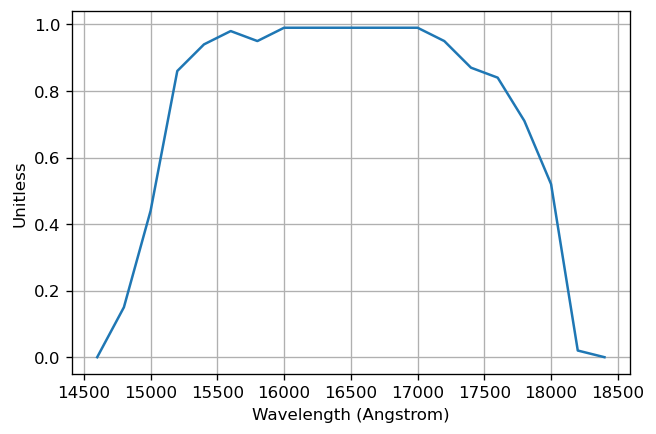

In [2]:
filt_LO_name = Filters.BESSEL_H
filt_LO = Filters.get(filt_LO_name)
mpl.rcParams['figure.dpi'] = 120
filt_LO.plot()
plt.grid()

zenith_angle = 30 * u.deg
airmass = 1 / np.cos(zenith_angle.to(u.rad))
f_vega = get_normalized_star_spectrum(spectral_type='vega', magnitude=0, filter_name=filt_LO_name)

sky = EsoSkyCalc(airmass=airmass, incl_moon='N')
sky_se = SpectralElement(Empirical1D, points=sky.lam, lookup_table=sky.trans)

lo_ch = MorfeoLowOrderChannelTransmissiveSystem_002()

# lo_ch_constant_transmittance = TransmissiveElement(
#     transmittance=Bandpass.top_hat(
#         peak_wl=1650*u.nm, delta_wl=165*u.nm, high_ampl=0.327, low_ampl=0.),
#     reflectance=Bandpass.zero())
# plt.figure()
# lo_ch.as_transmissive_element().plot(reflectance=False, absorptance=False)
# lo_ch_constant_transmittance.plot(reflectance=False, absorptance=False)
# plt.xlim(10000, 19000)

# filt = sky_se * lo_ch_constant_transmittance.transmittance 
filt = sky_se * lo_ch.as_transmissive_element().transmittance * filt_LO

obs = Observation(spec=f_vega, band=filt, force='taper', binset=f_vega.waveset)

area_subap = 1 * u.m**2
counts = obs.countrate(area=area_subap)
print(counts)
exp_time = 1 * u.s
# exp_time = 2 * u.ms
print((counts * exp_time).decompose() / 1e8)

In [3]:
wv_lo = lo_ch.as_transmissive_element().waveset
wv_lo_H_min = 1.5 * u.um
wv_lo_H_max = 1.8 * u.um
id_lo_H_min = np.where(np.isclose(np.array(wv_lo), wv_lo_H_min.to(u.Angstrom).value, atol=1e-9))[0][0]
id_lo_H_max = np.where(np.isclose(np.array(wv_lo), wv_lo_H_max.to(u.Angstrom).value, atol=1e-9))[0][0]

lo_trans_mean_H = np.mean(lo_ch.transmittance(wv_lo)[id_lo_H_min:id_lo_H_max])
print(lo_trans_mean_H)

0.30667526430418307
